TASK-3

Car Price Prediction

Importing dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

Data collection and preprocessing

In [ ]:
#Loading data into pandas dataframe
data=pd.read_csv('/content/car data.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
#checking no.of rows and columns
data.shape

(301, 9)

In [ ]:
#Seeing the first five rows of data frame
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# seeing last five rows of the dataframe
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [ ]:
# getting information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# checking for any null values
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [ ]:
# counting no.of cars of different names
data.Car_Name.value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [ ]:
#counting different fuel types
data.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
#counting selling type
data.Selling_type.value_counts()

Dealer        195
Individual    106
Name: Selling_type, dtype: int64

In [ ]:
#counting transmission
data.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [ ]:
#Encoding data
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2},'Selling_type':{'Dealer':0,'Individual':1},'Transmission':{'Maual':0,'Automatic':1}},inplace=True)

In [ ]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.212625,0.352159,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.425801,0.478439,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,1.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,3.000000


In [ ]:
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Data Visualization

In [ ]:
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

<Axes: xlabel='Year', ylabel='Selling_Price'>

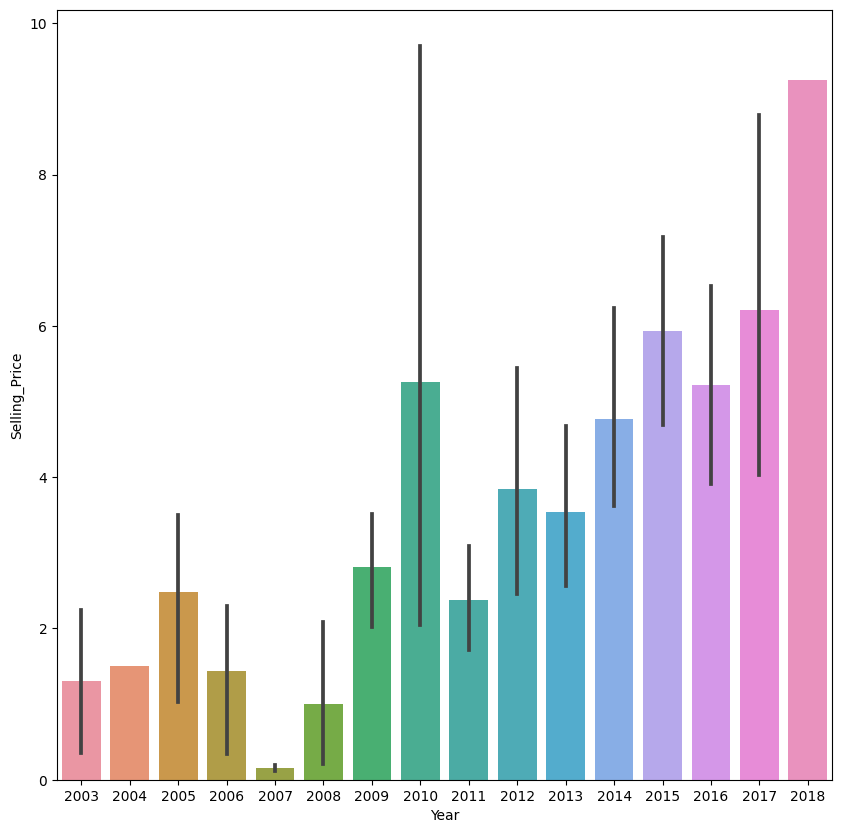

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='Year',y='Selling_Price',data=data)

<Axes: xlabel='Fuel_Type', ylabel='count'>

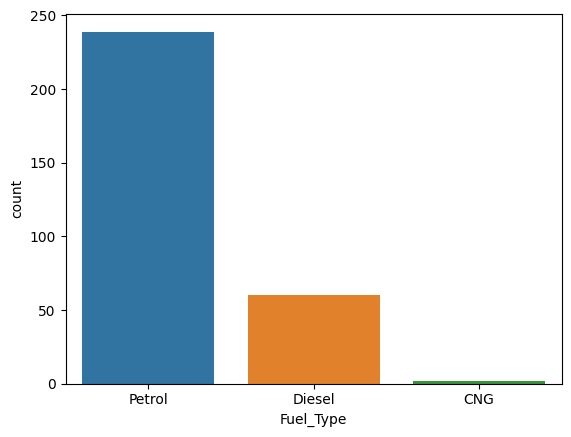

In [ ]:

sns.countplot(x='Fuel_Type',data=data)

<Axes: xlabel='Fuel_Type', ylabel='Selling_Price'>

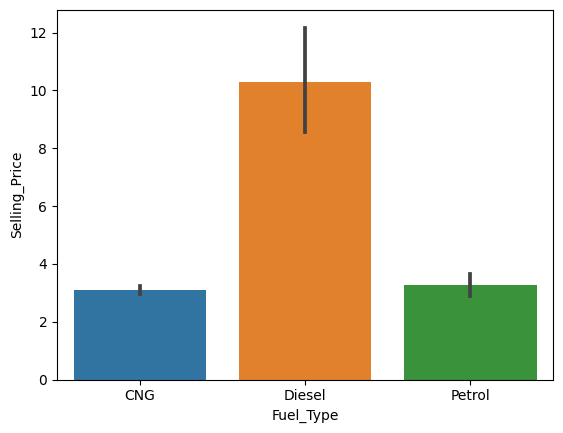

In [ ]:
sns.barplot(x='Fuel_Type',y='Selling_Price',data=data)

<Axes: xlabel='Year', ylabel='Present_Price'>

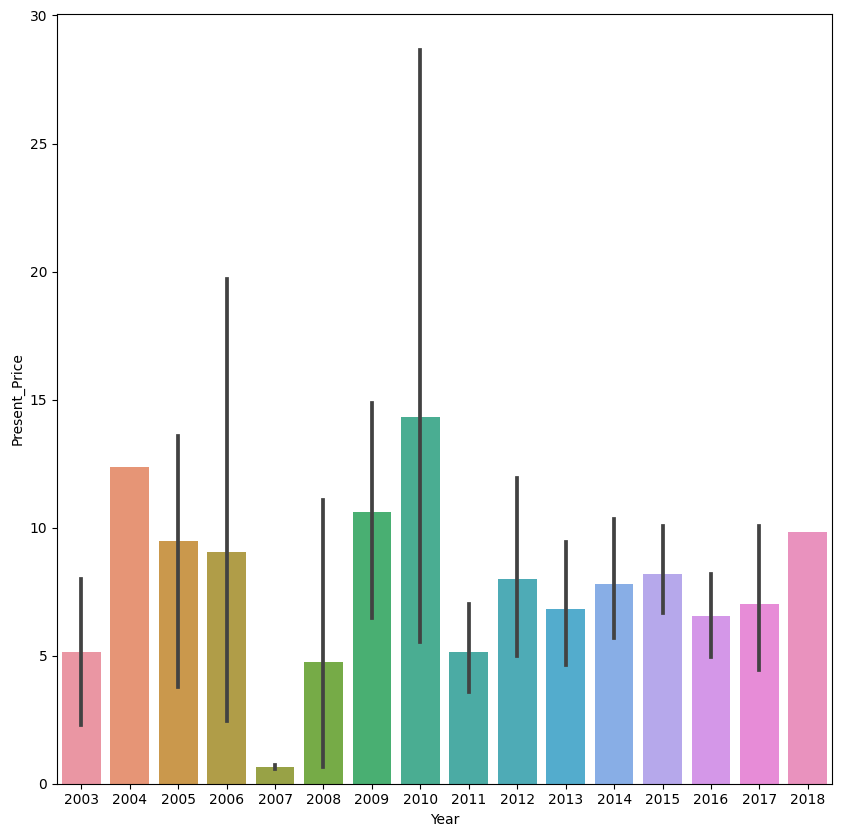

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='Year',y='Present_Price',data=data)

<Axes: xlabel='Year', ylabel='Selling_type'>

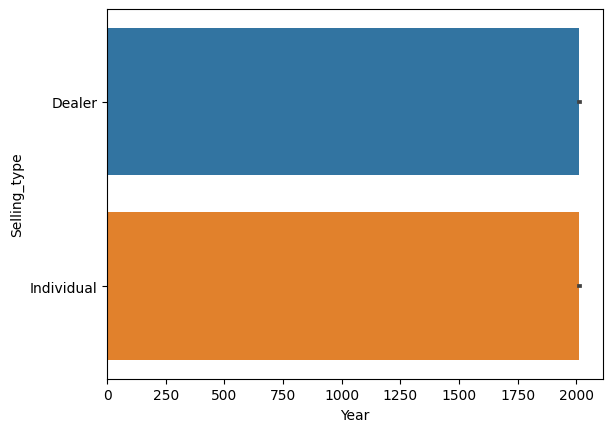

In [ ]:
sns.barplot(x='Year',y='Selling_type',data=data)

<Axes: xlabel='Selling_type', ylabel='count'>

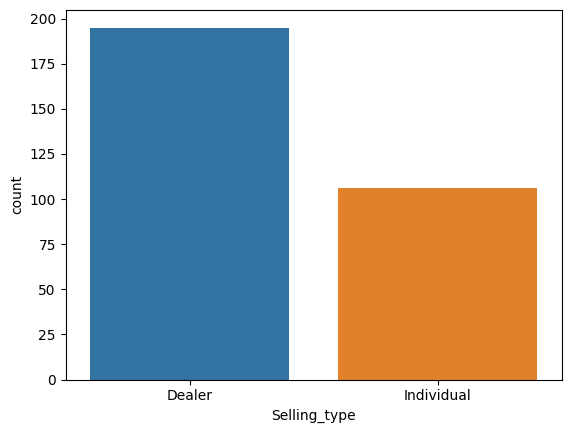

In [ ]:
sns.countplot(x='Selling_type',data=data)

<Axes: xlabel='Selling_type', ylabel='Selling_Price'>

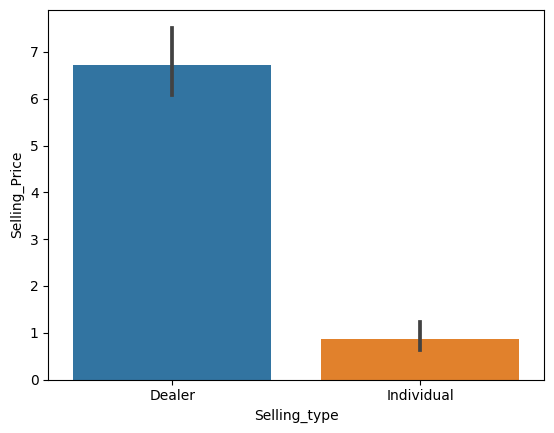

In [ ]:
sns.barplot(y='Selling_Price',x='Selling_type',data=data)

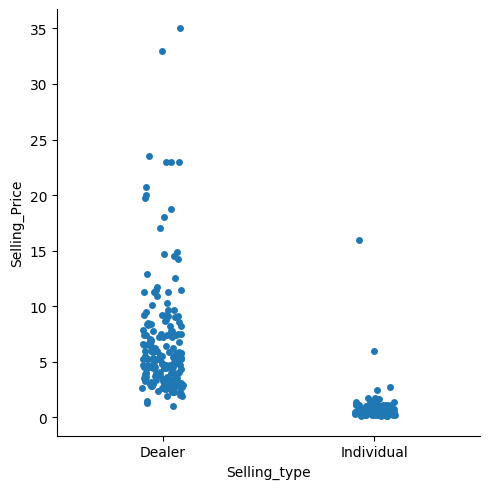

In [ ]:
sns.catplot(x='Selling_type',y='Selling_Price',data=data)

In [ ]:
x=data.drop(columns=['Car_Name','Selling_Price'],axis=1)
y=data.Selling_Price

In [ ]:
print(x)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [ ]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Training,Testing,Splitting

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=3)

In [ ]:
x.shape,x_train.shape,x_test.shape

((301, 7), (270, 7), (31, 7))

Model Training

In [ ]:
model=LinearRegression()


In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
x_train_prediction=model.predict(x_train)

In [ ]:
x_train_score2=r2_score(x_train_prediction,y_train)

In [ ]:
print(x_train_score2)

0.8696492459650914


Visualizing actual price and predicted price

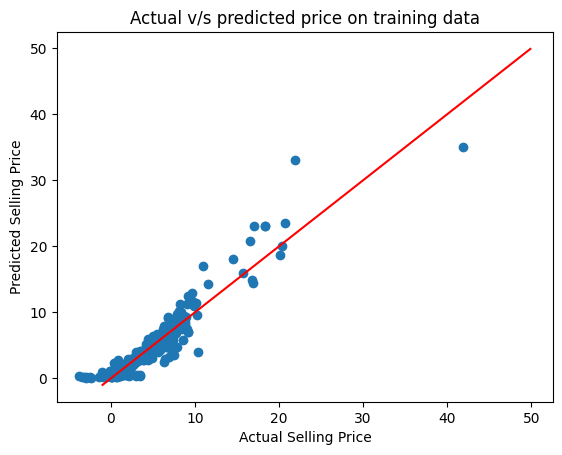

In [ ]:
plt.scatter(x_train_prediction,y_train)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual v/s predicted price on training data')
x=np.arange(-1,50,0.1)
y=np.arange(-1,50,0.1)
plt.plot(x,y,color="red")
plt.show()

In [ ]:
x_test_prediction=model.predict(x_test)

In [ ]:
x_test_score2=r2_score(x_test_prediction,y_test)

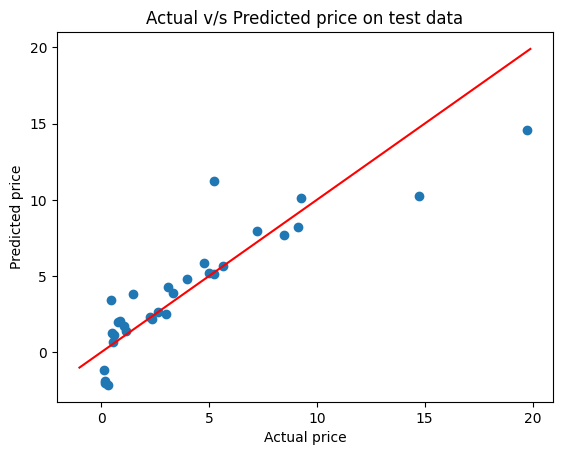

In [ ]:
plt.scatter(y_test,x_test_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title('Actual v/s Predicted price on test data')
x=np.arange(-1,20,0.1)
y=np.arange(-1,20,0.1)
plt.plot(x,y,color='red')
plt.show()


In [ ]:
print(x_test_score2)

0.7467993649497195
